In [1]:
from mpasanalysis import *
from e3sm_simulations import *
%matplotlib inline

In [2]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
ts_yr0 = 1
ts_yr1 = 1
plt_yr0 = 1
plt_yr1 = 1
rest_yr = 20
run = E3SMSimulation(database='e3sm_simulations.xml', runname='test-conus')
data_root = run.get_path(comp='ocn', climo_yr0=ts_yr0, climo_yr1=ts_yr1,
                         ts_yr0=ts_yr0, ts_yr1=ts_yr1, rest_yr=rest_yr)
rst_root = data_root['rst_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(rest_yr)
os.makedirs(fig_root, exist_ok=True)

In [3]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)
mpasdata = MPASOData(filepath=rst_file, filepath_mesh=rst_file)
varname_prefix='timeMonthly_avg_'

In [4]:
# set endpoints
trnsct0 = VerticalTransect('AR7W')
path0 = mpasmesh.get_shortest_path(trnsct0.lon0, trnsct0.lat0, trnsct0.lon1, trnsct0.lat1, npoint_ref=2)
trnsct1 = VerticalTransect('Davis Strait')
path1 = mpasmesh.get_shortest_path(trnsct1.lon0, trnsct1.lat0, trnsct1.lon1, trnsct1.lat1, npoint_ref=2)
trnsct2 = VerticalTransect('Hudson Strait')
path2 = mpasmesh.get_shortest_path(trnsct2.lon0, trnsct2.lat0, trnsct2.lon1, trnsct2.lat1, npoint_ref=2)
trnsct3 = VerticalTransect('Nares Strait')
path3 = mpasmesh.get_shortest_path(trnsct3.lon0, trnsct3.lat0, trnsct3.lon1, trnsct3.lat1, npoint_ref=2)
trnsct4 = VerticalTransect('Parry Channel')
path4 = mpasmesh.get_shortest_path(trnsct4.lon0, trnsct4.lat0, trnsct4.lon1, trnsct4.lat1, npoint_ref=2)
trnsct5 = VerticalTransect('Jones Sound')
path5 = mpasmesh.get_shortest_path(trnsct5.lon0, trnsct5.lat0, trnsct5.lon1, trnsct5.lat1, npoint_ref=2)


Pre-defined transect 'AR7W'.
Vertex closest to P0: 304.04520 53.50595
Vertex closest to P1: 311.93221 60.93171
 - Vertex closest to RefP1: 306.33229 56.04188
 - Vertex closest to RefP2: 308.94955 58.49666
Pre-defined transect 'Davis Strait'.
Vertex closest to P0: 298.48339 66.45757
Vertex closest to P1: 305.99791 67.00595
 - Vertex closest to RefP1: 300.93238 66.66670
 - Vertex closest to RefP2: 303.48882 66.87045
Pre-defined transect 'Hudson Strait'.
Vertex closest to P0: 295.16311 60.38350
Vertex closest to P1: 293.72891 61.89761
 - Vertex closest to RefP1: 294.71762 60.90440
 - Vertex closest to RefP2: 294.18521 61.40629
Pre-defined transect 'Nares Strait'.
Vertex closest to P0: 284.28707 77.98382
Vertex closest to P1: 287.56032 77.93724
 - Vertex closest to RefP1: 285.32554 77.97996
 - Vertex closest to RefP2: 286.52933 77.94967
Pre-defined transect 'Parry Channel'.
Vertex closest to P0: 281.26021 73.64901
Vertex closest to P1: 279.71589 74.61341
 - Vertex closest to RefP1: 280.758

Reading mesh data from /Users/qingli/data/mpas/test/conus/mpaso.rst.0020-01-01_00000.nc
Plotting map of Bottom Depth (m) at region 'LabSea'


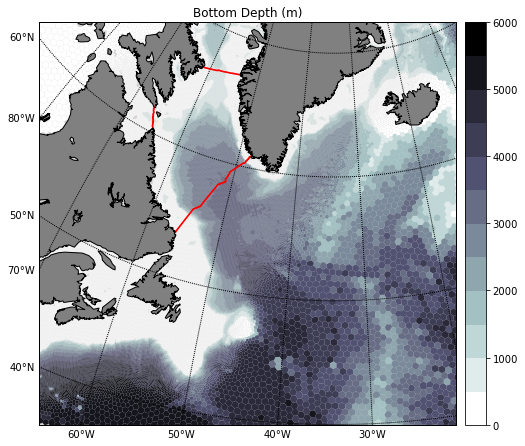

In [5]:

fig = plt.figure(figsize=[8,8])
levels = np.linspace(0, 6000, 13)
out = mpasmesh.get_map('bottomDepth', name='Bottom Depth'). \
      plot(region='LabSea', ptype='pcolor', cmap='bone_r', levels=levels)
m = out[0]
# plot paths
path0.plot_edge(m, c='r')
path1.plot_edge(m, c='r')
path2.plot_edge(m, c='r')
# save figure
figname = fig_root+'/LabSea_transect_location_pcolor.pdf'
fig.savefig(figname, dpi = 300)

Reading mesh data from /Users/qingli/data/mpas/test/conus/mpaso.rst.0020-01-01_00000.nc
Plotting map of Bottom Depth (m) at region 'Greenland'


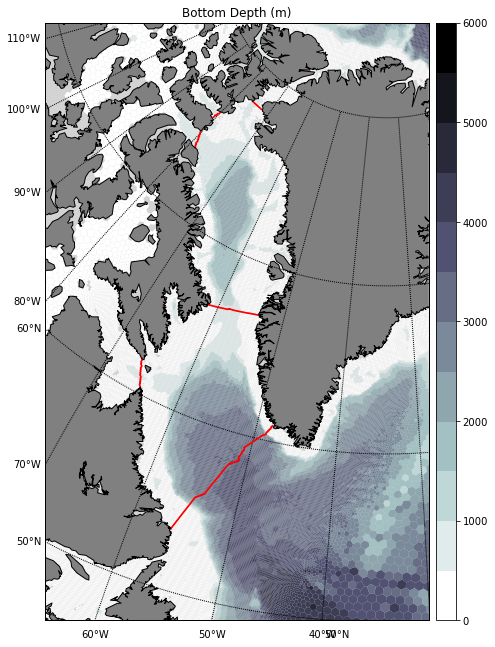

In [6]:

fig = plt.figure(figsize=[8,11])
levels = np.linspace(0, 6000, 13)
out = mpasmesh.get_map('bottomDepth', name='Bottom Depth'). \
      plot(region='Greenland', ptype='pcolor', cmap='bone_r', levels=levels)
m = out[0]
# plot paths
path0.plot_edge(m, c='r')
path1.plot_edge(m, c='r')
path2.plot_edge(m, c='r')
path3.plot_edge(m, c='r')
path4.plot_edge(m, c='r')
path5.plot_edge(m, c='r')
# save figure
figname = fig_root+'/Greenland_transect_location_pcolor.pdf'
fig.savefig(figname, dpi = 300)